# ***Credit Card Fraud Detection***

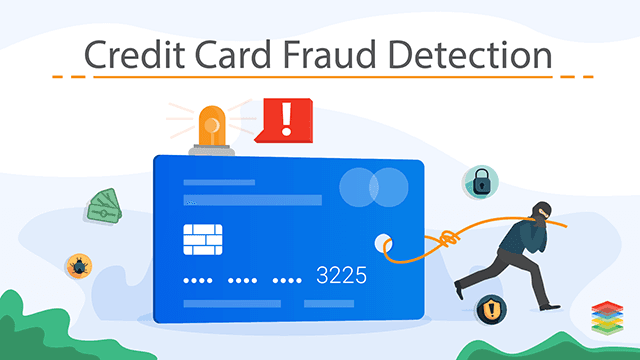

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [ ]:
# Load the dataset
df = pd.read_csv("fraudTrain.csv", low_memory=False)

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 

In [ ]:
# Get information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7

In [ ]:
# Get summary statistics of the numeric columns
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
       Unnamed: 0        cc_num          amt           zip          lat  \
count  7815.00000  7.815000e+03  7815.000000   7814.000000  7814.000000   
mean   3907.00000  4.078117e+17    68.661363  49479.396340    38.595821   
std    2256.14051  1.295068e+18   115.530027  27184.827244     5.198199   
min       0.00000  6.041621e+10     1.010000   1257.000000    20.027100   
25%    1953.50000  1.800184e+14     9.785000  26041.000000    34.852700   
50%    3907.00000  3.518759e+15    48.490000  49259.000000    39.376400   
75%    5860.50000  4.653879e+15    82.220000  72476.000000    41.846700   
max    7814.00000  4.992346e+18  3178.510000  99783.000000    65.689900   

              long      city_pop     unix_time    merch_lat   merch_long  \
count  7814.000000  7.814000e+03  7.814000e+03  7814.000000  7814.000000   
mean    -90.688408  8.823451e+04  1.325583e+09    38.599153   -90.685832   
std      14.512405  2.944470e+05  1.359720e+05     5.226

In [ ]:
# Print the column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
# Checking for Missing Values
print("\nChecking for Missing Values:")
print(df.isnull().sum())


Checking for Missing Values:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


# Data Preprocessing

In [ ]:
# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace=True)

# Data Visualization

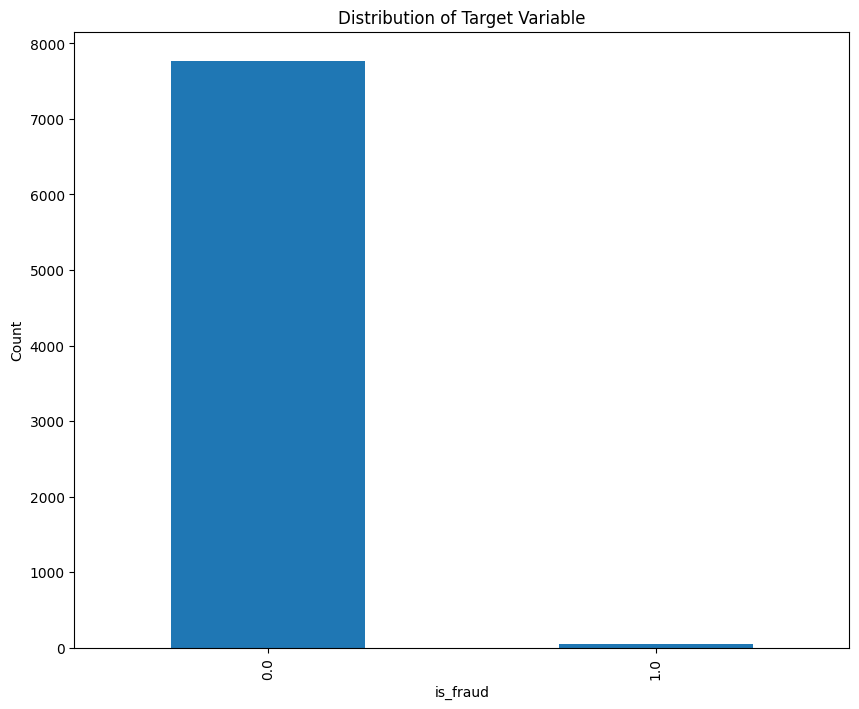

In [ ]:
# Visualize the distribution of the target variable 'is_fraud'
plt.figure(figsize=(10, 8))
df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

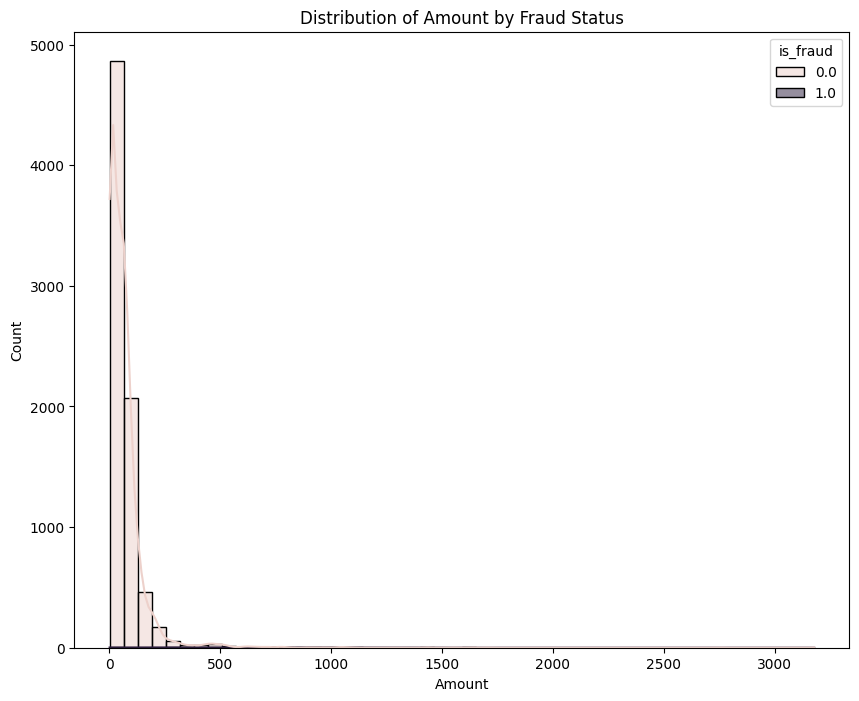

In [ ]:
# Visualize the distribution of 'amt' by fraud status
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, kde=True)
plt.title('Distribution of Amount by Fraud Status')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

In [ ]:
# Fill missing values using forward filling
df.fillna(method='ffill', inplace=True)

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Print the updated column names
print("\nUpdated Column names:")
print(df.columns)


Updated Column names:
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


In [ ]:
# Print the updated column names
print("\nUpdated Column names:")
print(df.columns)


Updated Column names:
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


In [ ]:
# Limit the dataset to 20,000 rows (optional)
df = df.head(n=20000)

In [ ]:
# Check the distribution of the target variable after limiting the dataset
print("\nDistribution of 'is_fraud' after limiting the dataset:")
print(df.is_fraud.value_counts())


Distribution of 'is_fraud' after limiting the dataset:
0.0    7770
1.0      45
Name: is_fraud, dtype: int64


In [ ]:
# Check the distribution of the target variable after limiting the dataset
print("\nDistribution of 'is_fraud' after limiting the dataset:")
print(df.is_fraud.value_counts())


Distribution of 'is_fraud' after limiting the dataset:
0.0    7770
1.0      45
Name: is_fraud, dtype: int64


# Logistic Regression

In [ ]:
x_train = df.drop(columns='is_fraud', axis=1)
y_train = df['is_fraud']

In [ ]:
# Initialize and fit a Logistic Regression model
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

In [ ]:
# Load the test dataset
df_test = pd.read_csv('fraudTest.csv')

In [ ]:
# Drop unnecessary columns in the test dataset
df_test.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace=True)

In [ ]:
# Sample the test dataset (optional)
data_test = df_test.sample(frac=1, random_state=1).reset_index()
data_test = data_test.head(n=5000)

In [ ]:
# Check the distribution of the target variable in the test dataset
print("\nDistribution of 'is_fraud' in the test dataset:")
print(data_test.is_fraud.value_counts())

In [ ]:
# Convert categorical features to dummy variables in the test dataset
df_processed_test = pd.get_dummies(data=data_test)

In [ ]:
# Prepare the test data
x_test = df_processed_test.drop(columns='is_fraud', axis=1)
y_test = df_processed_test['is_fraud']

In [ ]:
# Fit the Logistic Regression model on the test data
LR.fit(x_test, y_test)

LogisticRegression(solver='liblinear')

In [ ]:
# Make predictions and calculate accuracy
predictions = LR.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

In [ ]:
print("\nLogistic Regression Model Accuracy:", accuracy)


Logistic Regression Model Accuracy: 0.9954


# Random Forest

In [ ]:
# Separate features and target variable
X = df.drop(columns='is_fraud', axis=1)
y = df['is_fraud']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize a StandardScaler for feature scaling
scaler = StandardScaler()

In [ ]:
# Drop non-numeric columns
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])


In [ ]:
# Scale the features in the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit the Random Forest model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions and calculate accuracy
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Print classification report
print("\nRandom Forest Model Accuracy:", accuracy)
print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 0.999360204734485

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1550
         1.0       1.00      0.92      0.96        13

    accuracy                           1.00      1563
   macro avg       1.00      0.96      0.98      1563
weighted avg       1.00      1.00      1.00      1563

